<a href="https://colab.research.google.com/github/PriyanshChaudhary/Flowers_Classifier_Img_Augmentation/blob/master/flowers_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [0]:
#import packages
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL, 
                                   fname="flower_photos.tgz", 
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 2s 0us/step


In [0]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [5]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [0]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
batch_size = 100
IMG_SHAPE = 150

In [8]:
image_gen = ImageDataGenerator(rescale =1./255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


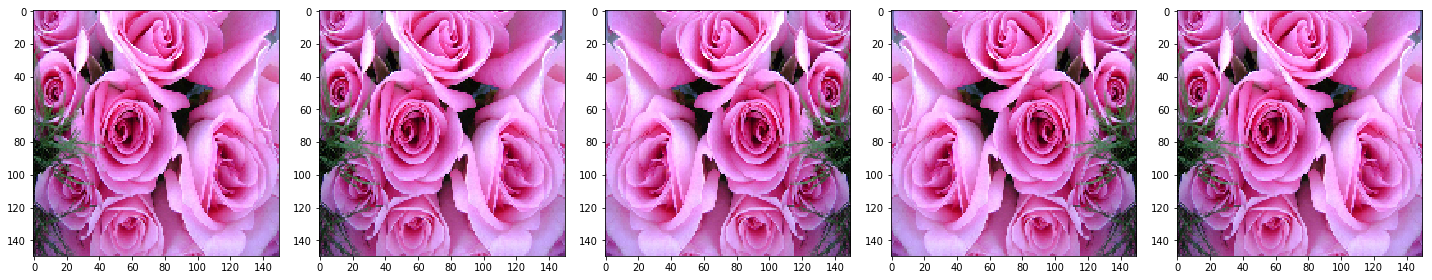

In [9]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [10]:
image_gen = ImageDataGenerator(rescale =1./255, rotation_range = 45)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE,IMG_SHAPE))



Found 2935 images belonging to 5 classes.


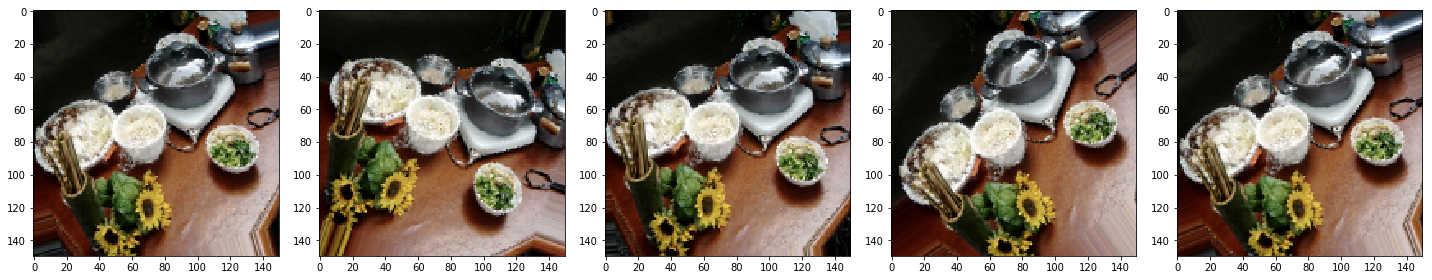

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
image_gen = ImageDataGenerator(rescale =1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE,IMG_SHAPE))
 

Found 2935 images belonging to 5 classes.


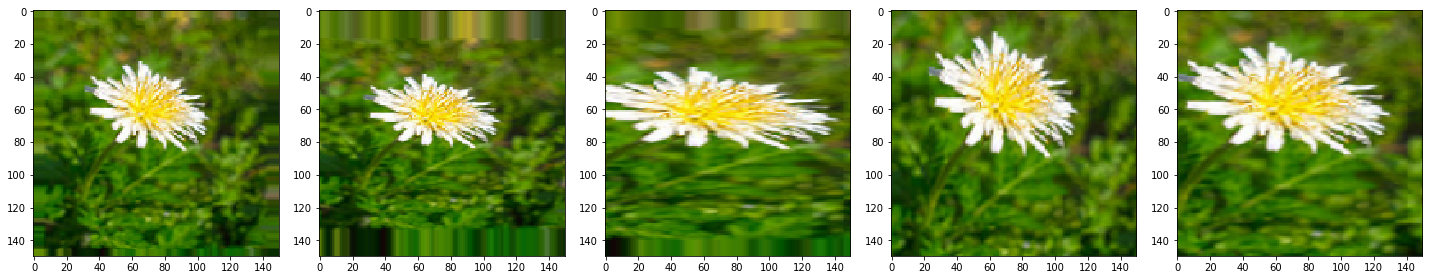

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [14]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=0.2,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size, 
                                                     directory=train_dir, 
                                                     shuffle=True, 
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse')

Found 2935 images belonging to 5 classes.


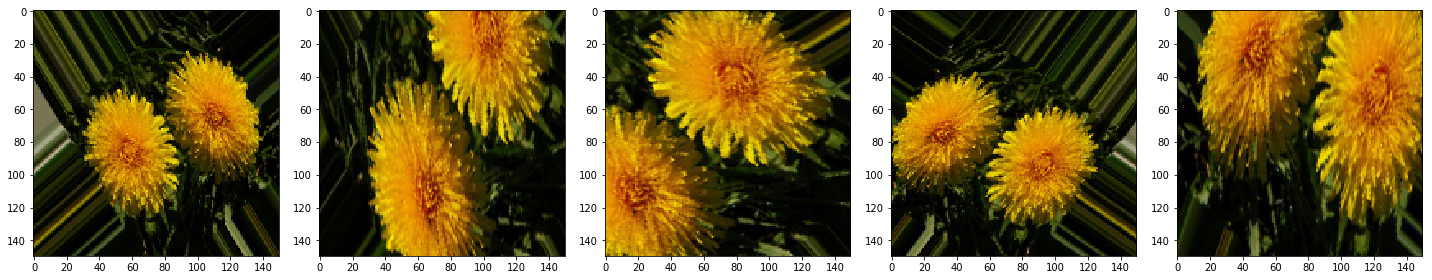

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [16]:
image_gen_val = ImageDataGenerator(rescale = 1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory = val_dir,
                                                 target_size = (IMG_SHAPE,IMG_SHAPE),
                                                 class_mode = 'sparse'
                                                )

Found 735 images belonging to 5 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3),activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3),activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3),activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(5, activation ='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Compile the model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [19]:
epochs = 10

history = model.fit_generator(
train_data_gen,
    steps_per_epoch = int(np.ceil(len(train)/float(batch_size))),
    epochs= epochs,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(len(val)/float(batch_size)))
)

Epoch 1/10
30/30 [==============================] - 23s 764ms/step - loss: 1.3851 - acc: 0.3942 - val_loss: 1.1950 - val_acc: 0.5102
Epoch 2/10
30/30 [==============================] - 20s 674ms/step - loss: 1.1271 - acc: 0.5411 - val_loss: 1.0819 - val_acc: 0.5646
Epoch 3/10
30/30 [==============================] - 20s 678ms/step - loss: 1.0221 - acc: 0.6007 - val_loss: 1.0634 - val_acc: 0.5878
Epoch 4/10
30/30 [==============================] - 20s 683ms/step - loss: 0.9709 - acc: 0.5976 - val_loss: 1.0272 - val_acc: 0.5959
Epoch 5/10
30/30 [==============================] - 21s 690ms/step - loss: 0.9267 - acc: 0.6453 - val_loss: 1.0092 - val_acc: 0.6286
Epoch 6/10
30/30 [==============================] - 21s 686ms/step - loss: 0.8775 - acc: 0.6589 - val_loss: 0.9055 - val_acc: 0.6639
Epoch 7/10
30/30 [==============================] - 21s 685ms/step - loss: 0.8596 - acc: 0.6702 - val_loss: 0.9741 - val_acc: 0.6272
Epoch 8/10
30/30 [==============================] - 20s 676ms/step - 

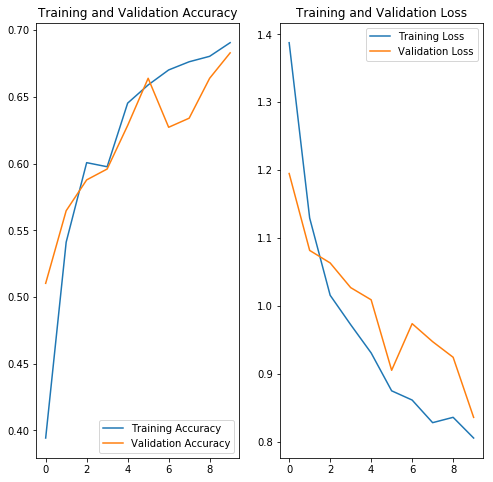

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

